https://machinelearningmastery.com/lstm-autoencoders/

In [1]:
# LSTM Autoencoder recreate sequence
from numpy import array

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model

In [2]:
# Define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [3]:
# Reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1,n_in, 1))

In [4]:
# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

In [5]:
model.compile(optimizer='adam', loss='mse')

In [6]:
# Fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

In [7]:
# Connect the encoder LSTM as the output layer
model = Model(inputs=model.inputs, outputs=model.layers[0].output)

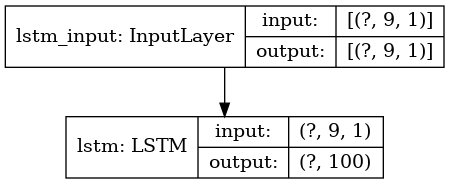

In [8]:
plot_model(model, show_shapes=True, to_file='lstm_encoder.png')

In [9]:
# Get the feature vector from the input sequence
yhat = model.predict(sequence)
print(yhat.shape)
print(yhat)

(1, 100)
[[0.         0.08702312 0.         0.         0.01152137 0.
  0.         0.         0.         0.         0.01556426 0.
  0.         0.04092364 0.08052678 0.         0.10315596 0.
  0.         0.09717562 0.04495927 0.         0.09482914 0.06236263
  0.01418065 0.08006009 0.         0.00678434 0.         0.
  0.         0.09843545 0.03778737 0.0870938  0.01832412 0.10639407
  0.03841675 0.08041448 0.         0.         0.05816917 0.
  0.         0.         0.05853579 0.         0.         0.
  0.09899393 0.06425054 0.         0.         0.         0.0877713
  0.04908763 0.         0.         0.         0.07734418 0.09474027
  0.         0.         0.         0.         0.08105904 0.11175214
  0.         0.0116356  0.         0.         0.         0.
  0.         0.         0.         0.         0.02138343 0.
  0.08065251 0.         0.         0.0616249  0.01919017 0.
  0.         0.         0.04931701 0.06353901 0.         0.10248061
  0.0432469  0.         0.         0.       